<a href="https://colab.research.google.com/github/pablet99/IA_Credit_Risk_TFG/blob/main/TFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install -q jupyterlab_vim jupyterlab_templates
!pip install -q streamlit
!jupyter labextension install @jupyter-widgets/jupyterlab-manager --no-build
!jupyter labextension install @jupyterlab/fastaudio --no-build
!jupyter labextension install jupyterlab-plotly --no-build
!jupyter labextension install plotlywidget --no-build
!jupyter lab build

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.7/160.7 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 119.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 KB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [24]:
import pandas as pd #para leer archivos CSV
import numpy as np #para arrays y operaciones matemáticas
import seaborn as sns #para ver datos y regresiones
import matplotlib.pyplot as plt #para sacar funciones por pantalla
from sklearn.metrics import accuracy_score #para la regresión logística


from sklearn.linear_model import LogisticRegression #para hacer la regresión logística
from sklearn.preprocessing import StandardScaler #para estandarizar datos
from sklearn.model_selection import train_test_split #para poder dividir los datos de entrenamiento y test

from google.colab import drive #para poder acceder a Drive de colab 

#A continuación se leen los datos y se eliminan las filas que tengan "null"
datos_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cs-training.csv",sep = ',',index_col=[0]) 

#train_limpios = datos_train.dropna()
datos_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cs-test.csv",sep = ',',index_col=[0]) 
#test_limpios = datos_test.dropna()



In [25]:
#Saco un porcentaje de los datos que son de entreno y los que son de test
total_data = len(datos_train) + len(datos_test)
test_percent = len(datos_test)/total_data
train_percent = len(datos_train)/total_data
#imprimo
print("Porcentaje de datos de test: %.3f " % test_percent)
print("Porcentaje de datos de train: %.3f" % train_percent)

Porcentaje de datos de test: 0.404 
Porcentaje de datos de train: 0.596


<Axes: >

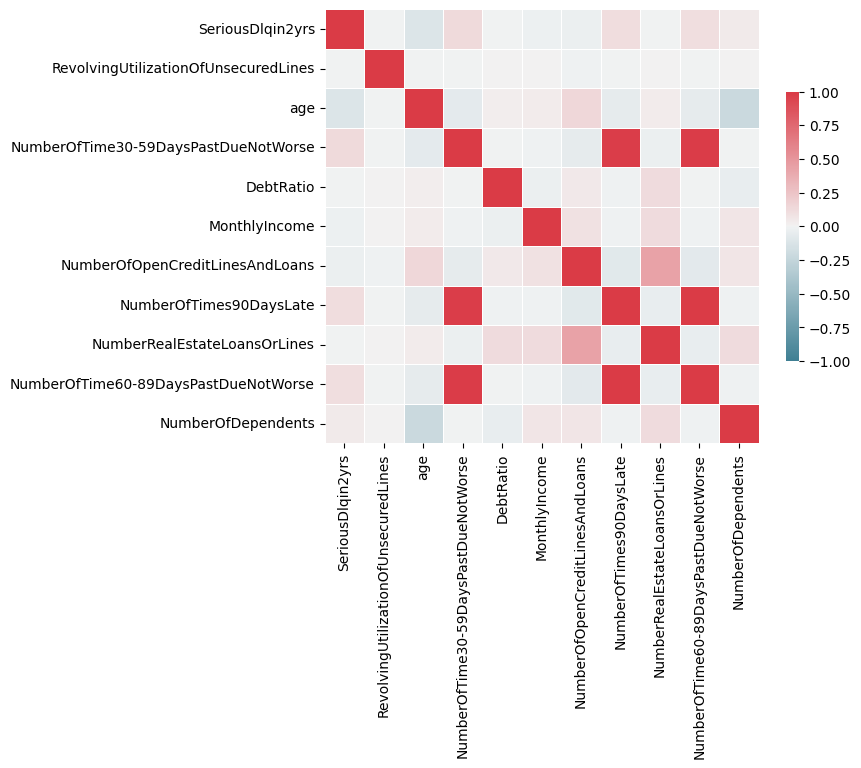

In [26]:
# Matriz de correlaciones.

# La matriz de correlación nos permite averiguar cómo de correladas o
# o relacionadas están dos variables. De este modo, podremos prescindir
# de campos cuya información sea explicada por otros campos.

corr = datos_train.corr()

# Inicializamos la firgura de matplotlib.
f, ax = plt.subplots(figsize=(7, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujamos el mapa de calor.
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
#Dado que numerosas variables tienen una matriz de correlación igual a 1, 
#eliminaremos una de las dos, ya que podemos incidir en problemas de colinealidad
#Las relaciones de 1 son: 
# NumberOfTimes90DaysLate-NumberOfTIme30-59DaysPastDueNotWorse (elimino esta)
# NumberOfTimes90DaysLate-NumberOfTIme60-89DaysPastDueNotWorse (elimino esta)
#NumberOfTIme30-59DaysPastDueNotWorse-NumberOfTIme60-89DaysPastDueNotWorse (ambas)

datos_train2=datos_train.drop(["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTime60-89DaysPastDueNotWorse"],axis=1)
datos_test2=datos_test.drop(["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTime60-89DaysPastDueNotWorse"],axis=1)


In [28]:
datos_train2=datos_train2.dropna() #elimina las filas con Nan


In [29]:
#pasamos ahora a entrenar el modelo y comprobarlo mediante regresión logística

X_train_data = datos_train2.drop("SeriousDlqin2yrs",axis=1) #esta linea permite quitar la columna primera y quedarse con el resto
y_train_data= datos_train2["SeriousDlqin2yrs"] #la columna quitada es la que se adjudica a esa variable
X_test = datos_test2.drop("SeriousDlqin2yrs",axis=1) #lo mismo para el test
X_test=X_test.dropna() #elimino las filas que tienen valores NaN
y_test = datos_test2["SeriousDlqin2yrs"] #la primera columna del test se adjudica a esa variable

X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, random_state = 42) #esto permite dividir los datos de la columna de forma aleatoria
#Las siguientes lineas sirven para estandarizar los datos
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [30]:
# A continuación se realiza la regresión logística
lr = LogisticRegression(random_state=42, class_weight="balanced",max_iter=500) #se itera máximo 500 veces para que tenga fin 
lr.fit(X_train_scaled, y_train) 
y_pred = lr.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print('Precisión: {:.2f}%'.format(accuracy*100))

Precisión: 71.27%


In [31]:
output = pd.concat([X_test, pd.DataFrame({"predicciones": y_pred})], axis=1)
output.to_csv("/content/drive/MyDrive/Colab Notebooks/predicciones.csv", index=False)


In [ ]:
!pip install streamlit
import streamlit as st

st.title('Modelo de Riesgo de Crédito con Python')
st.write('Esta aplicación te permitirá predecir si un cliente es apto para recibir un crédito o no.')
uploaded_file = st.file_uploader("/content/drive/MyDrive/Colab Notebooks/predicciones.csv", type=['csv'])


In [33]:
if uploaded_file is not None:
    # Leer el archivo CSV y crear un DataFrame
    data = pd.read_csv(uploaded_file)

    # Mostrar el DataFrame en la aplicación
    st.write('Datos cargados:')
    st.write(data)

    # Predecir la probabilidad de crédito para cada cliente
    proba = model.predict_proba(data)[:, 1]

    # Mostrar las probabilidades en la aplicación
    st.write('Probabilidades de crédito:')
    st.write(proba)

In [ ]:
!jupyter nbconvert --to python TFG.ipynb

!streamlit run TFG.py
